# UnivariateSpline

In [1]:
import os
import pandas as pd
inDir="C:\Users\Fengwanwan\Documents\Python Scripts\Code_training\CHG"
files= os.listdir(inDir) #得到文件夹下的所有文件名称
i=0
for file in files: #遍历文件夹  
     if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
          df =pd.read_table(os.path.join(inDir,file),header=None,names=["SE_Event","exon_len",os.path.splitext(file)[0]])
          if i==0:
                Data=df
                i+=1
          else:
            Data=pd.merge(Data,df,on=["SE_Event","exon_len"])
          #print(os.path.basename(file))


In [3]:
Data.shape

(30, 53)

# original data

No handlers could be found for logger "matplotlib.legend"


['273', '276', '273']


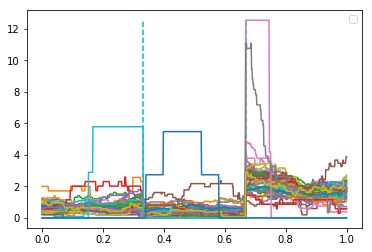

['116', '178', '141']


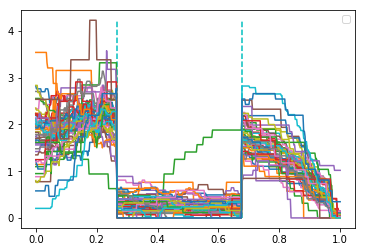

['171', '72', '117']


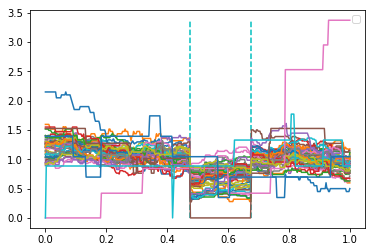

['147', '123', '202']


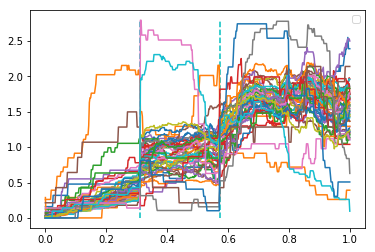

['87', '63', '800']


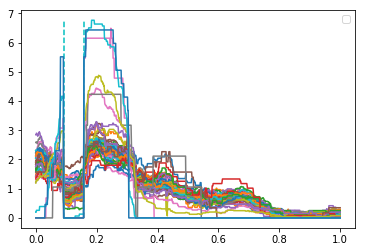

['191', '123', '202']


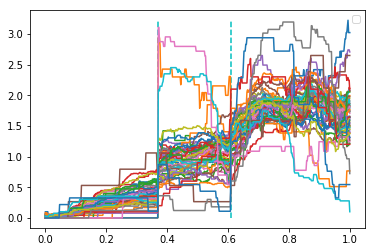

['57', '416', '152']


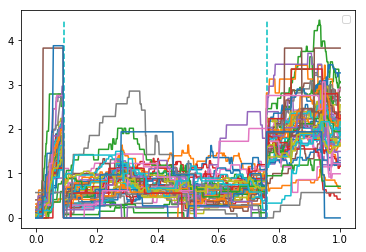

['123', '57', '202']


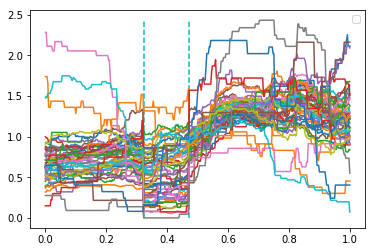

['209', '63', '177']


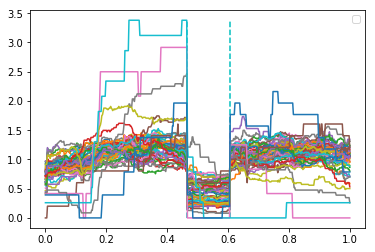

['228', '45', '937']


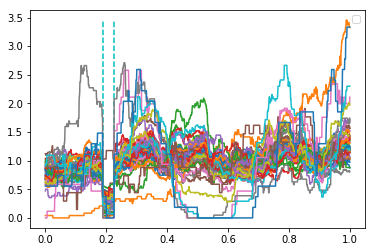

['123', '78', '300']


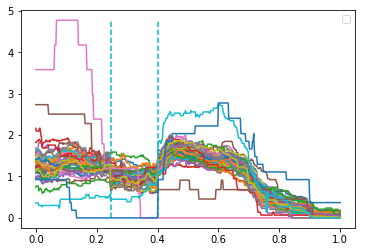

['118', '102', '456']


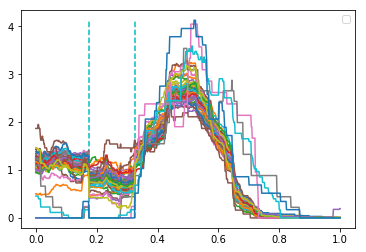

['120', '233', '131']


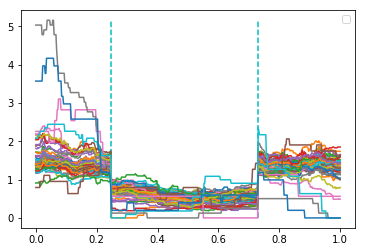

['402', '60', '390']


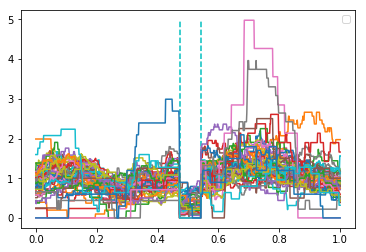

['69', '57', '2626']


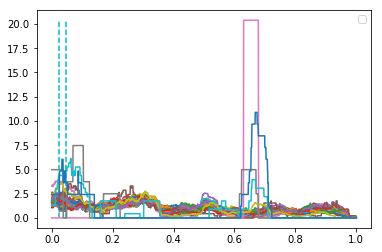

['168', '168', '420']


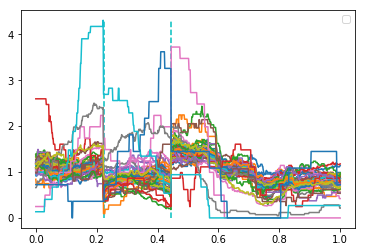

['215', '73', '212']


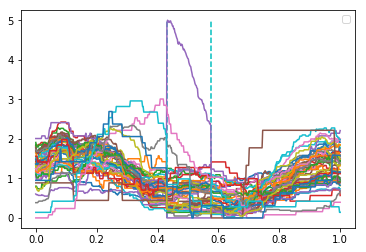

['469', '418', '356']


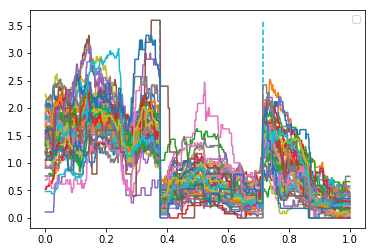

['27', '148', '162']


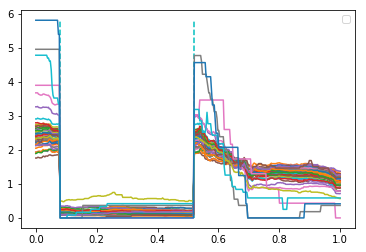

['253', '36', '127']


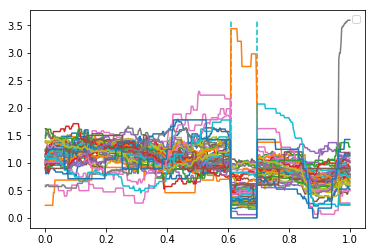

['142', '104', '209']


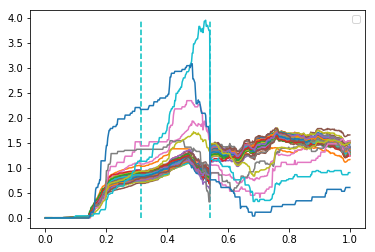

['374', '146', '341']


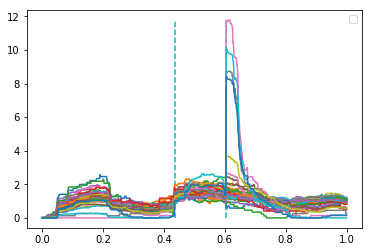

['429', '82', '208']


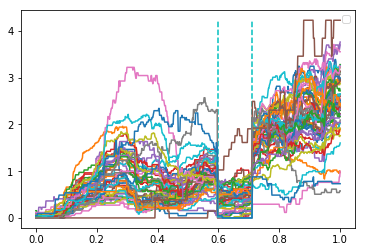

['374', '163', '341']


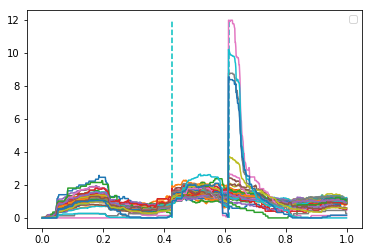

['1713', '4407', '207']


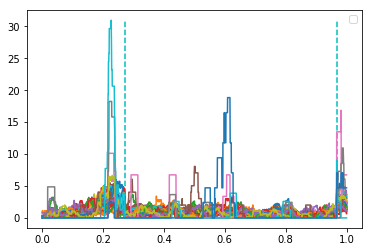

['240', '248', '199']


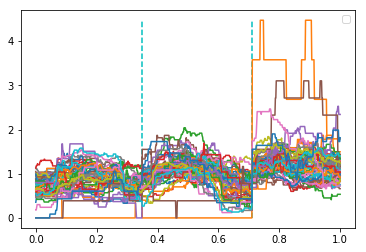

['1021', '240', '199']


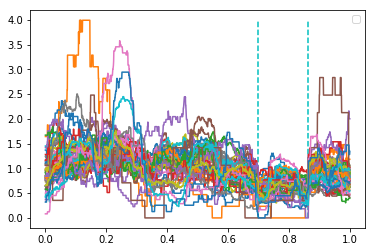

['866', '57', '79']


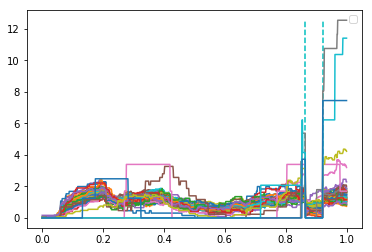

['103', '79', '76']


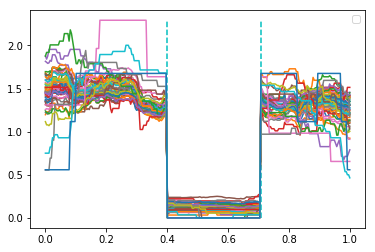

['77', '64', '2221']


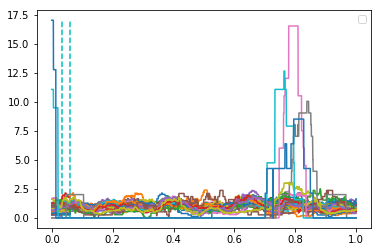

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(Data.shape[0]):
    max=0
    for j in range(2,Data.shape[1]):
        depth=np.array(Data.iloc[i,j].split(","),dtype="int32")
        mean=np.mean(depth)
        standard=depth/mean
        if max < np.max(standard):
            max =np.max(standard)
        x=np.linspace(0,1,len(depth))
        plt.plot(x,standard)
        plt.legend(bbox_to_anchor=(1,1))
    exon_len=Data.iloc[i,1].split(",")
    exon0,exon1,exon2=np.array(exon_len,dtype="int32")
    print(exon_len)
    exon0_1=exon0/float(len(depth)-1)
    exon1_2=(exon0+exon1)/float(len(depth)-1)
    plt.vlines(exon0_1, 0,max, colors = "c", linestyles = "dashed")
    plt.vlines(exon1_2, 0,max, colors = "c", linestyles = "dashed")
    plt.show()
   
    
        

# spline smooth

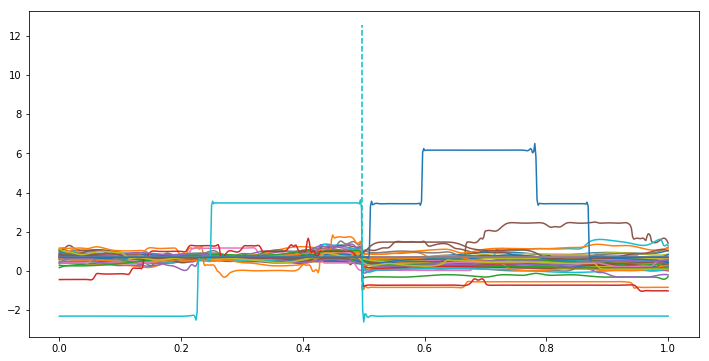

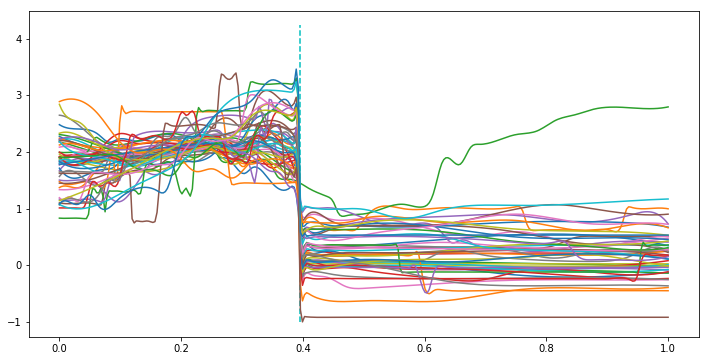

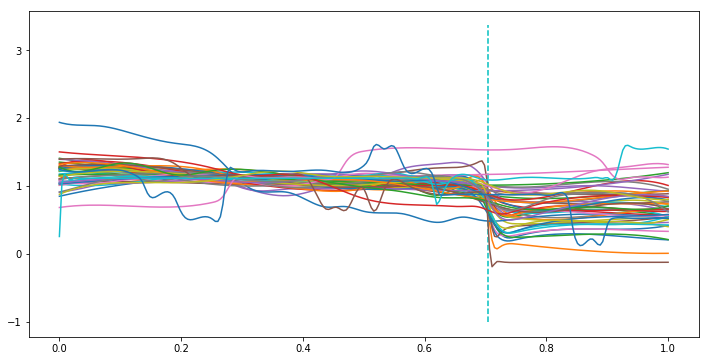

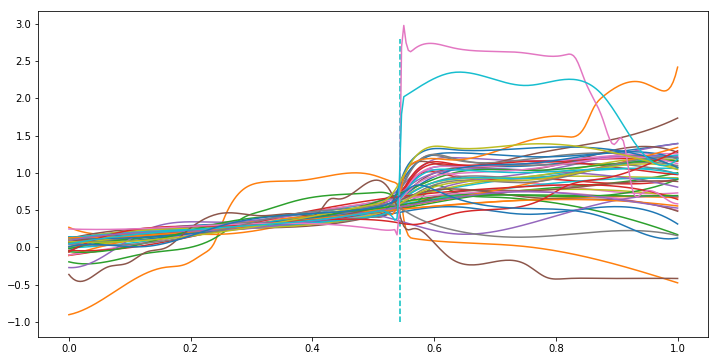

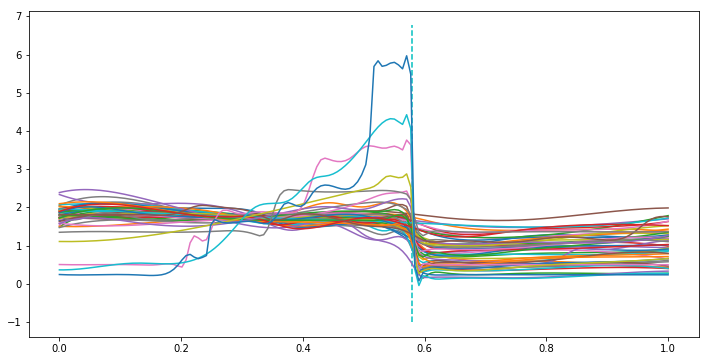

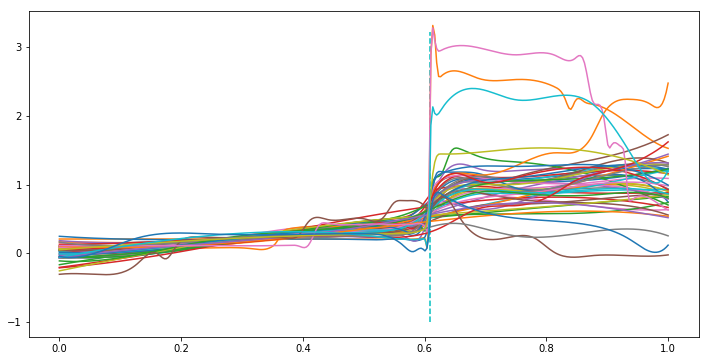

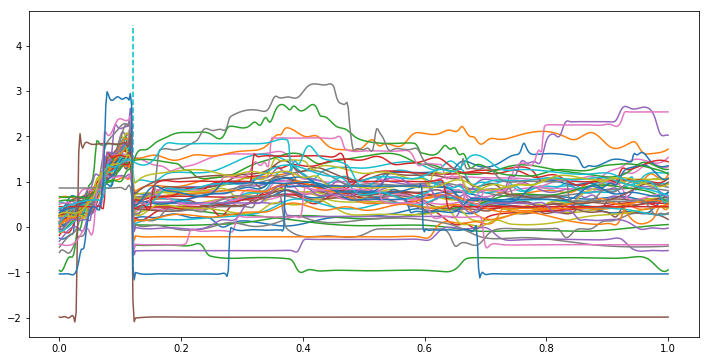

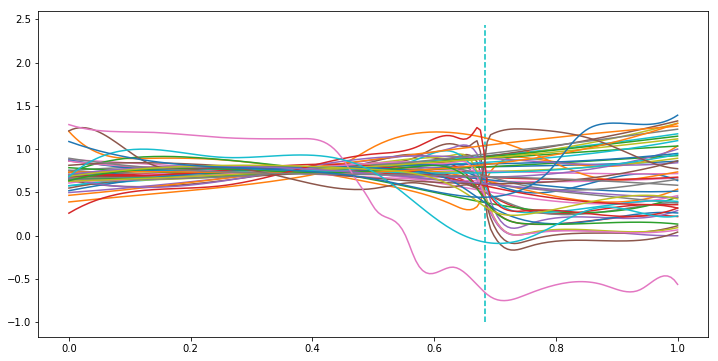

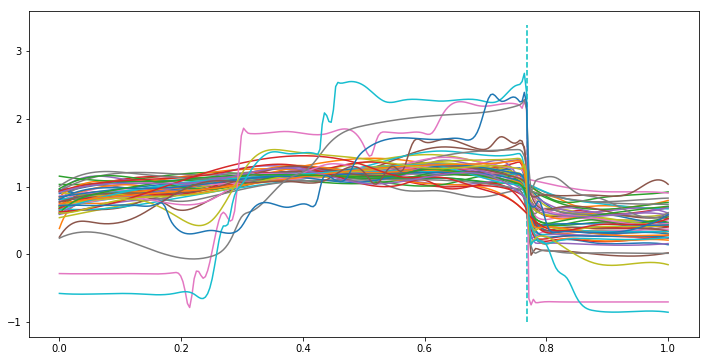

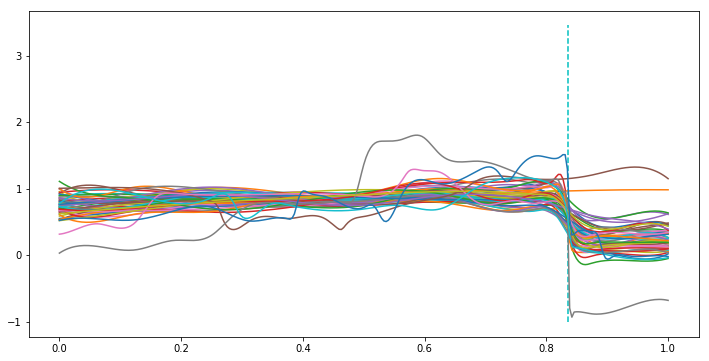

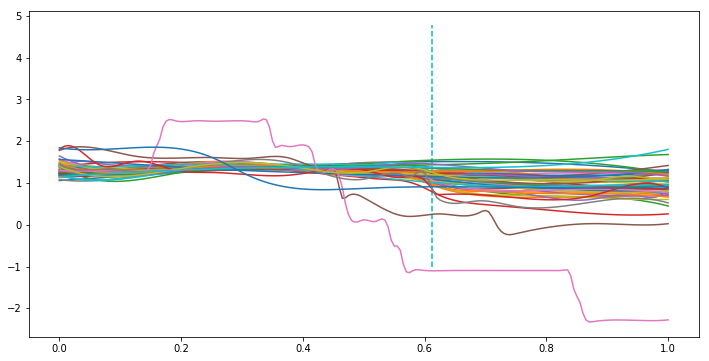

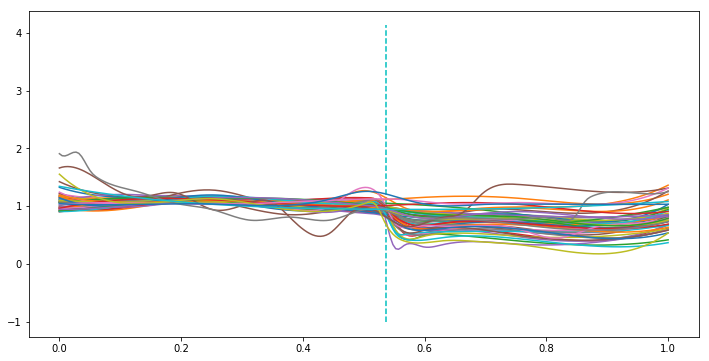

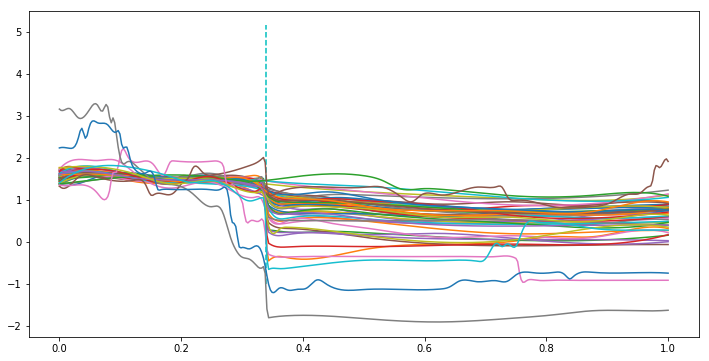

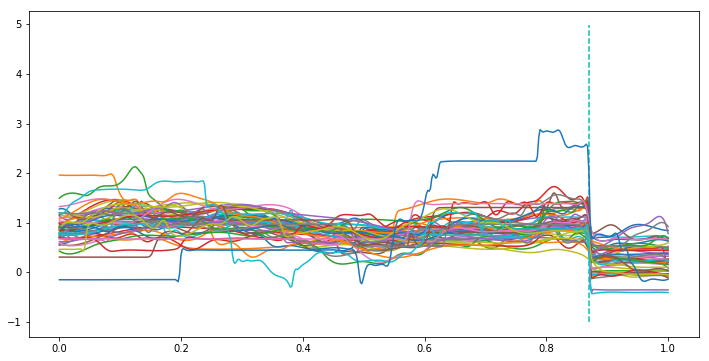

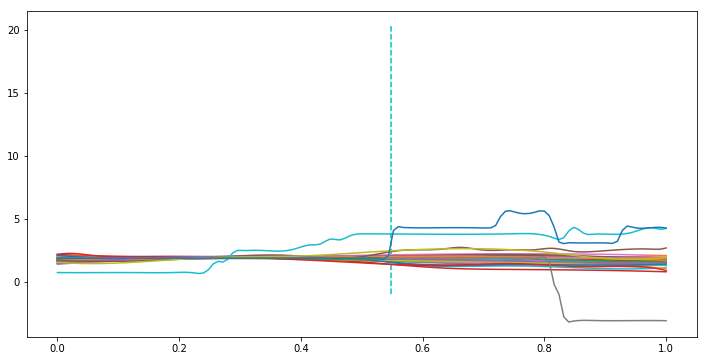

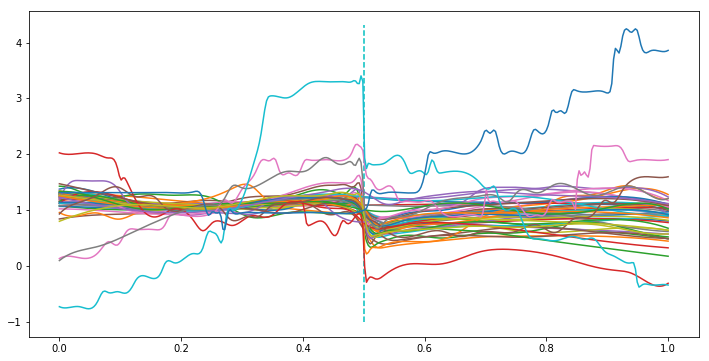

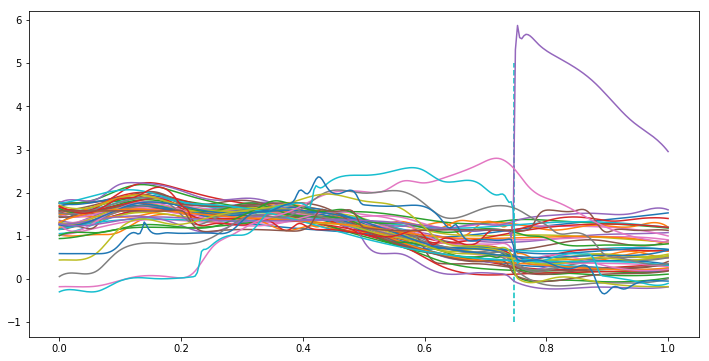

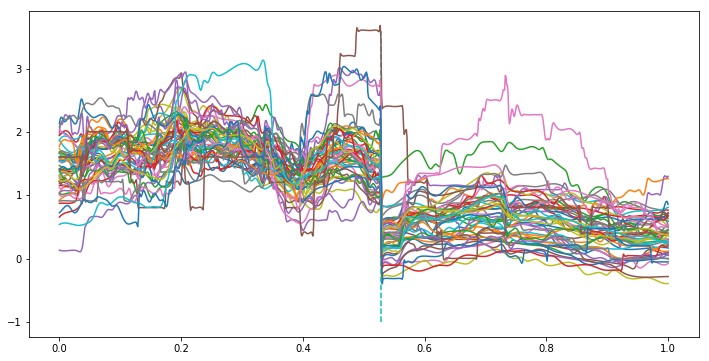

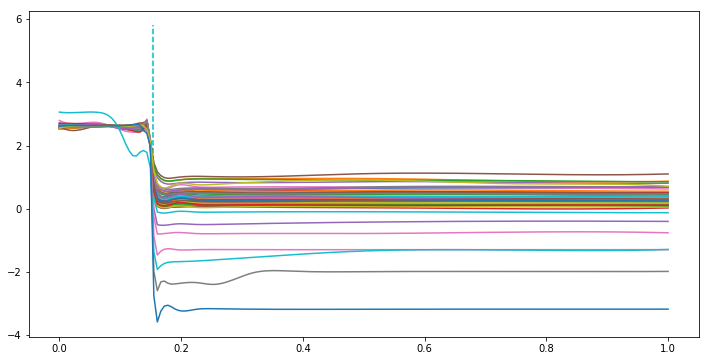

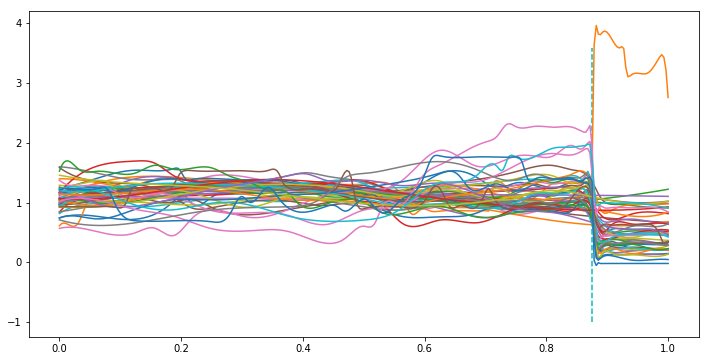

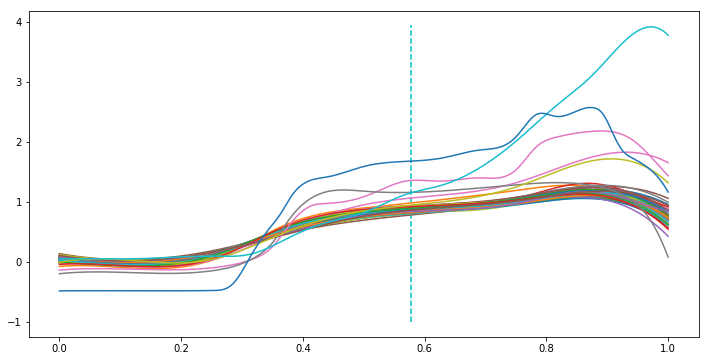

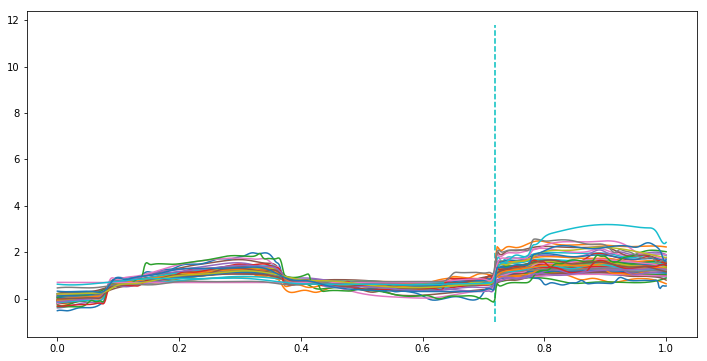

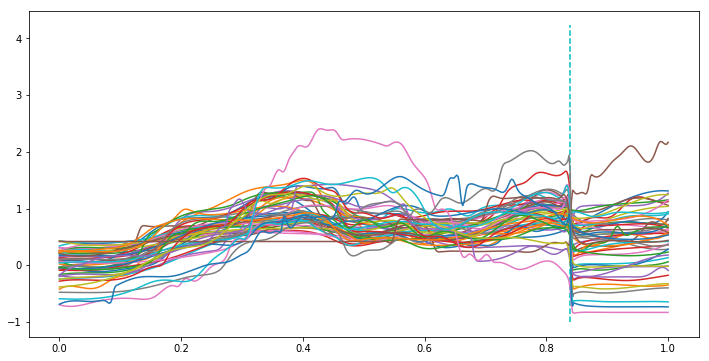

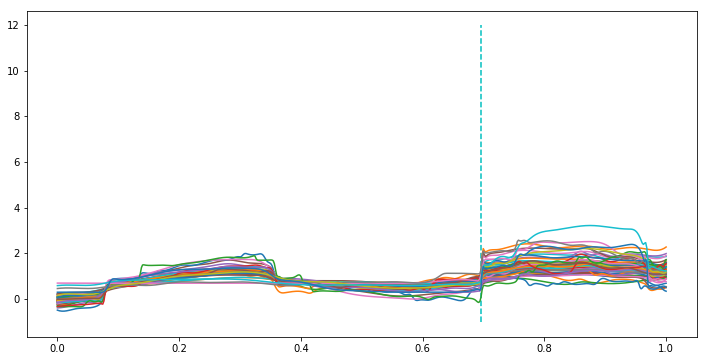

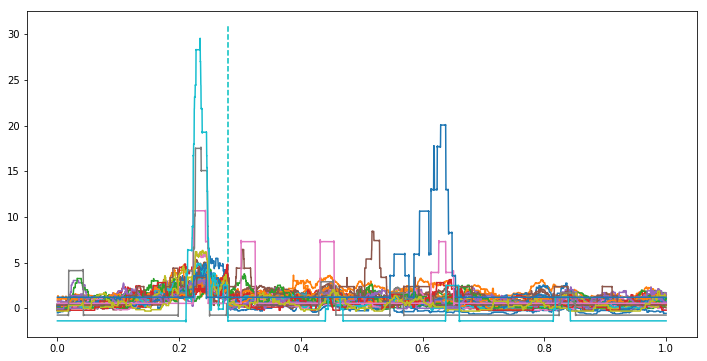

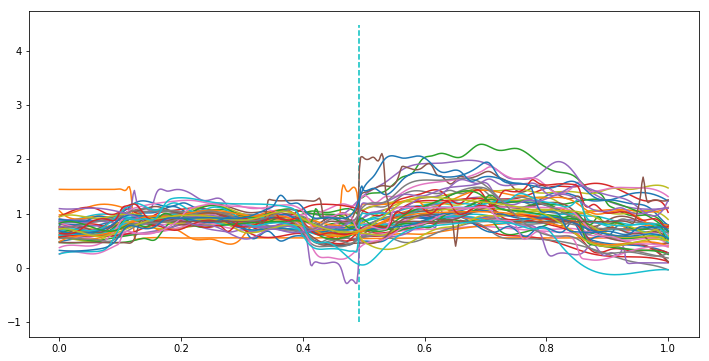

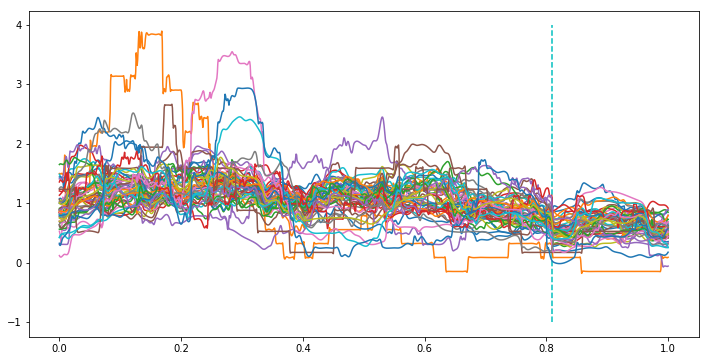

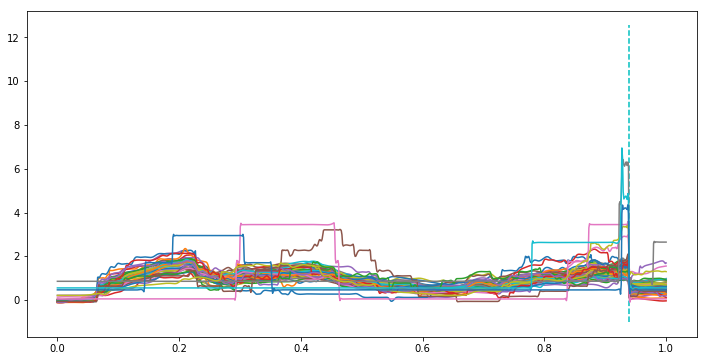

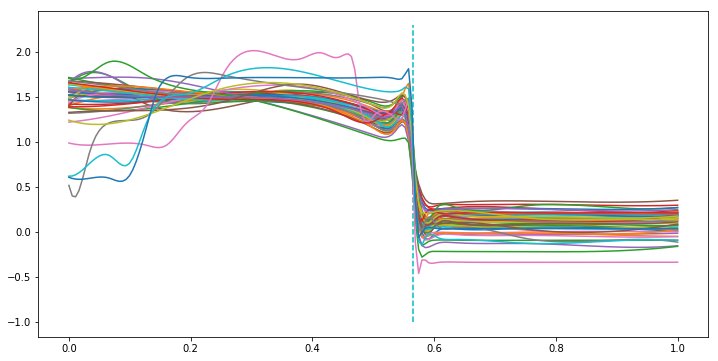

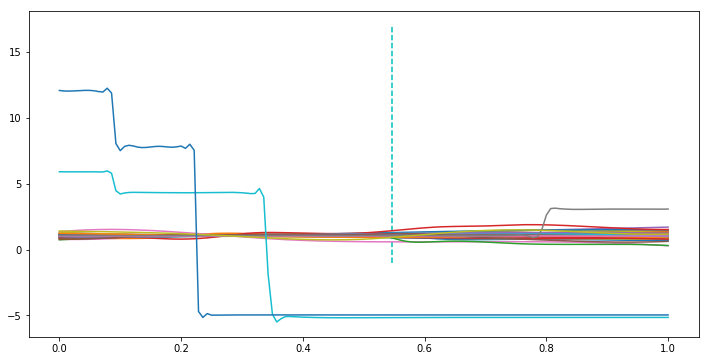

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
from scipy import interpolate
for i in range(Data.shape[0]):
    max=0
    exon_len=Data.iloc[i,1].split(",")
    exon0,exon1,exon2=np.array(exon_len,dtype="int32")       
    for j in range(2,Data.shape[1]):
        depth=np.array(Data.iloc[i,j].split(","),dtype="int32")
        mean=np.mean(depth)
        standard=depth/mean
        if max < np.max(standard):
            max =np.max(standard)
        X=np.linspace(0,1,exon0+exon1)
        spline=interpolate.UnivariateSpline(X,standard[0:exon0+exon1],s=0.5)
        sZ=spline(X)
        if j ==2:
            exon0_depth=sZ[0:exon0]
            Z=sZ
        else:
            exon0_depth=np.vstack([exon0_depth,sZ[0:exon0]])
            Z=np.vstack([Z,sZ])
    mean_exon0=np.mean(exon0_depth,axis=0)
    for k in range(2,Data.shape[1]):
        from scipy import optimize

        def residuals(mean_exon0,b):
            
            return mean_exon0+b
        b,_=optimize.curve_fit(residuals,mean_exon0,exon0_depth[k-2,:])
        if k ==2:
            Y=Z[k-2,:]-b            
        else:
            Y=np.vstack([Y,Z[k-2,:]-b])
    split=exon0/float(exon0+exon1)
    for l in range(Y.shape[0]):
        plt.plot(X,Y[l,:])
    plt.vlines(split, -1,max, colors = "c", linestyles = "dashed")
    plt.show()